In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Task Details
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

Expected Submission
Submit a well documented notebook with these four sections:

* Section 01: Exploratory Data Analysis
1. Are there any null values or outliers? How will you wrangle/handle them?
1. Are there any variables that warrant transformations?
1. Are there any useful variables that you can engineer with the given data?
1. Do you notice any patterns or anomalies in the data? Can you plot them?
* Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

1. What factors are significantly related to the number of store purchases?
1. Does US fare significantly better than the Rest of the World in terms of total purchases?
1. Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
1. Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
1. Is there a significant relationship between geographical regional and success of a campaign?
* Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

1. Which marketing campaign is most successful?
1. What does the average customer look like for this company?
1. Which products are performing best?
1. Which channels are underperforming?
* Section 04: CMO Recommendations
Bring together everything from Sections 01 to 03 and provide data-driven recommendations/suggestions to your CMO.

**Evaluation**
This is not a formal competition, so results won't be measured using a strict metric. Rather, what one would like to see is a well-defined process of exploratory and statistical analysis with insightful conclusions.

1. Data Exploration - Was the data wrangled properly? How well was the data analyzed? Are there any useful visualizations? Does the reader learn any new techniques through this submission? A great entry will be informative and thought provoking.
1. Statistical Analysis - Were the right statistical tests used? How well was the statistical output interpreted? A great entry will interpret results without the use of any statistical jargon.
1. Business Recommendation - Were the recommendations tied to your analysis in Sections 1-3? Are they data-driven and focused on marketing concepts such as targets, channels, or products?
1. Documentation - Are your code, and notebook well documented so a reader can understand what you did? Are your sources clearly cited? A high quality analysis should be concise and clear at each step so the rationale is easy to follow and the process is reproducible.

1. **ID**=Customer's unique identifier
1. **Year_Birth**=Customer's birth year
1. **Education**=Customer's education level
1. **Marital_Status**=Customer's marital status
1. **Income**=Customer's yearly household income
1. **Kidhome**=Number of children in customer's household
1. **Teenhome**=Number of teenagers in customer's household
1. **Dt_Customer**=Date of customer's enrollment with the company
1. **Recency**=Number of days since customer's last purchase
1. **MntWines**=Amount spent on wine in the last 2 years
1. **MntFruits**=Amount spent on fruits in the last 2 years
1. **MntMeatProducts**=Amount spent on meat in the last 2 years
1. **MntFishProducts**=Amount spent on fish in the last 2 years
1. **MntSweetProducts**=Amount spent on sweets in the last 2 years
1. **MntGoldProds**=Amount spent on gold in the last 2 years
1. **NumDealsPurchases**=Number of purchases made with a discount
1. **NumWebPurchases**=Number of purchases made through the company's web site
1. **NumCatalogPurchases**=Number of purchases made using a catalogue
1. **NumStorePurchases**=Number of purchases made directly in stores
1. **NumWebVisitsMonth**=Number of visits to company's web site in the last month
1. **AcceptedCmp3**=1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1. **AcceptedCmp4**=1 if customer accepted the offer in the 4th campaign, 0 otherwise
1. **AcceptedCmp5**=1 if customer accepted the offer in the 5th campaign, 0 otherwise
1. **AcceptedCmp1**=1 if customer accepted the offer in the 1st campaign, 0 otherwise
1. **AcceptedCmp2**=1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1. **Response**=1 if customer accepted the offer in the last campaign, 0 otherwise
1. **Complain**=1 if customer complained in the last 2 years, 0 otherwise
1. **Country**=Customer's location

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
import sklearn
import math

In [ ]:
Data=pd.read_csv('../input/marketing-data/marketing_data.csv')
Data.head()

In [ ]:
Data.info()

In [ ]:
list_medium_income=[]
list0=[]
a=pd.DataFrame(Data[' Income '].isna().values,columns=['Incomenan'])
for i in Data[' Income '].copy().dropna():
    foo=int(i.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
    list_medium_income.append(foo)
Data[' Income ']=Data[' Income '].fillna(int(np.mean(list_medium_income)))
for i in Data[' Income ']:
    if i ==int(np.mean(list_medium_income)):
        list0.append(i*1000)
        pass
    else:
        foo=int(i.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
        list0.append(foo*1000)
Data=pd.concat([Data.drop(columns=[' Income ','ID']),pd.DataFrame(list0,columns=['Income']),a],axis=1)

In [ ]:
day=[]
month=[]
year=[]
for _ in Data['Dt_Customer']:
    _=_.split('/')
    day.append(int(_[1]))
    month.append(int(_[0]))
    year.append(int(_[2]))
Data=pd.concat([Data.drop(columns=['Dt_Customer']),pd.DataFrame(day,columns=['day']),pd.DataFrame(month,columns=['month']),pd.DataFrame(year,columns=['year'])],axis=1)

In [ ]:
# How many unique values are in Columns of Data ?
for i in Data.columns:
    print(F'{i}:',len(Data[i].unique()))

In [ ]:
Data.head(5)

In [ ]:
Data.info()

In [ ]:
plt.figure(figsize=(20,10))
seaborn.heatmap(Data.corr(),annot=True)
plt.show()

In [ ]:
label = 'Accept','Not Aceept'
plt.pie([len(Data['Response'][Data['Response']==1]),len(Data['Response'][Data['Response']==0])],labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Last Campagin');

In [ ]:
Data.describe().T

In [ ]:
for i in Data.columns:
    if Data[i].dtype=='<i8': 
        print('type int64:',i,'Mean:',int(Data[i].mean()))
    else:
        print('type object:',i,'Mode:',Data[i].mode()[0])

In [ ]:
for _ in Data.columns:
    if _=='Response'or _=='Income':
        pass
    else:
        fig = plt.figure(figsize = (10, 5))
        uniqe_list=[i for i in Data[Data['Response']==1][f'{_}'].unique()]
        uniqe_values=[len(Data[Data['Response']==1][f'{_}'][Data[Data['Response']==1][f'{_}']==i]) for i in Data[Data['Response']==1][f'{_}'].unique()]

        plt.bar(uniqe_list, uniqe_values, color ='pink',width = 0.4)
        plt.xlabel(f"{_} values of  who accepted last campaign  features",fontsize=10)
        plt.ylabel(f"{_} values of  who accepted last campaign  Values",fontsize=10)
        plt.title(f"{_} values of  who accepted last campaign ",fontsize=15);

In [ ]:
# mean,mode of accept response 
for i in Data.columns:
    if Data[i].dtype=='<i8': 
        print('type int64:',i,'Mean:',int(Data[i][Data['Response']==1].mean()))
    else:
        print('type object:',i,'Mode:',Data[i][Data['Response']==1].mode()[0])

In [ ]:
# mean,mode of don't accept response 
for i in Data.columns:
    if Data[i].dtype=='<i8': 
        print('type int64:',i,'Mean:',int(Data[i][Data['Response']==0].mean()))
    else:
        print('type object:',i,'Mode:',Data[i][Data['Response']==0].mode()[0])

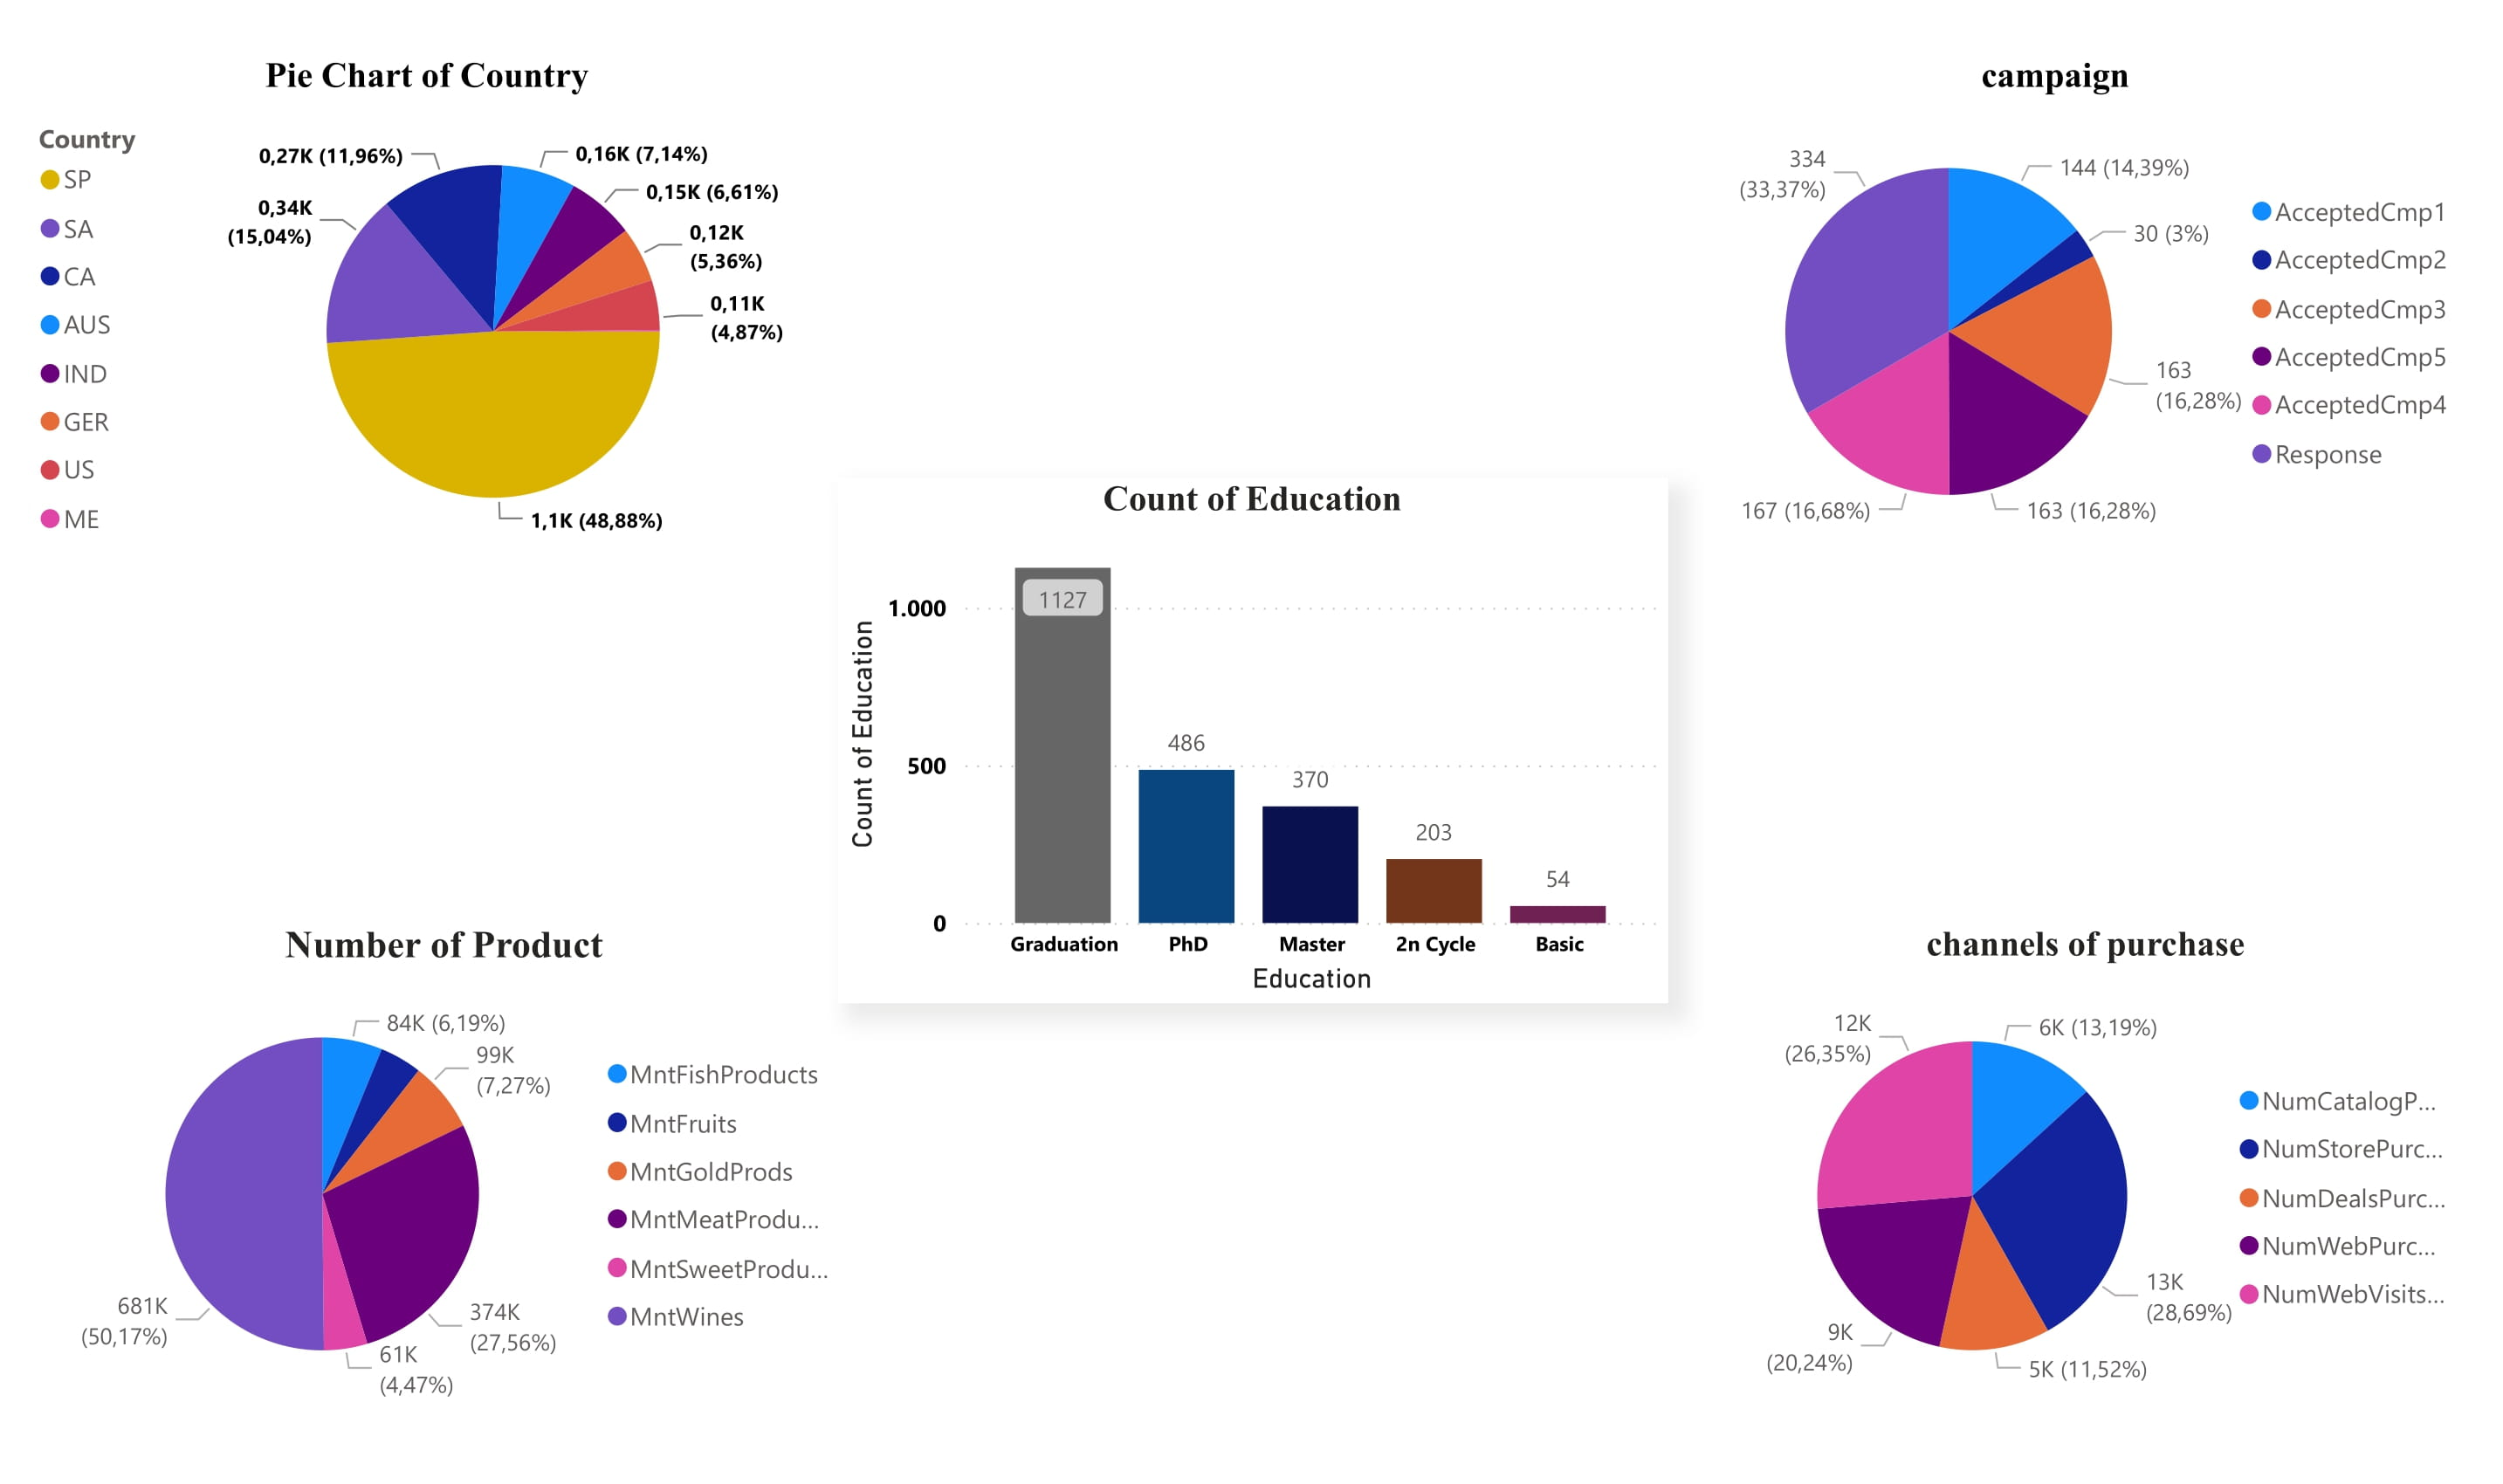

In [ ]:
Data.head()

In [ ]:
education=pd.get_dummies(Data['Education'],drop_first=True)
marital=pd.get_dummies(Data['Marital_Status'],drop_first=True)
country=pd.get_dummies(Data['Country'],drop_first=True)
ıncomenan=pd.get_dummies(Data['Incomenan'],drop_first=True)

In [ ]:
new_data=pd.concat([Data.drop(columns=['Education','Marital_Status','Incomenan','Country']),education,marital,country,ıncomenan],axis=1)

In [ ]:
new_data.head()

In [ ]:
x=new_data.copy().drop(columns=['Response']).values
y=new_data['Response'].values

# Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
print('Train_x:',x_train.shape)
print('Train_y:',y_train.shape)
print('Test_x:',x_test.shape)
print('Test_y:',y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
obje_ss=StandardScaler()

x_train_ss=obje_ss.fit_transform(x_train)
x_test_ss=obje_ss.fit_transform(x_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_le=LogisticRegression(random_state=42,max_iter=10000)
model_le.fit(x_train,y_train)
parameters = {'C':[0.8,0.9,1,1.1,1.2]}
model_le_grid = GridSearchCV(model_le, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train,y_train)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:',model_le.score(x_train,y_train)*100)
print('Logistic Regression Cros validation score:',model_le_grid.best_score_*100)

In [ ]:
model_le=LogisticRegression(random_state=42,C=0.8)
model_le.fit(x_train,y_train)
print('Logistic Regression Train score:',model_le.score(x_train,y_train)*100)

## Support Vector Classication 

In [ ]:
from sklearn import svm

model_svc=svm.SVC(random_state=42)
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train_ss,y_train)
print(model_svc_grid.best_params_)


print('Support Vecktor Classification Cros validation score:',model_svc_grid.best_score_*100)

In [ ]:
model_svc=svm.SVC(random_state=42,C=0.8,kernel='linear')
model_svc.fit(x_train_ss,y_train)
print('Support Vecktor Classification Train score:',model_svc.score(x_train_ss,y_train)*100)

## Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_jobs=-1)
parameters = {'n_estimators':[50,100,200,300,400],'max_depth':[3,4,5,6]}
model_rfc_grid = GridSearchCV(model_rfc, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train,y_train)
print(model_rfc_grid.best_params_)

print('Random Forest Classifier Cros validation score:',model_rfc_grid.best_score_*100)

In [ ]:
model_rfc=RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=6)
model_rfc.fit(x_train,y_train)
print('Random Forest Classifier Train score:',model_rfc.score(x_train,y_train)*100)

In [ ]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(n_jobs=-1,random_state=42,eval_metric='logloss')
parameters = {'n_estimators':[50,100,200],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.01]}
model_xgb_grid = GridSearchCV(model_xgb, parameters,cv=10,verbose=1).fit(x_train,y_train)
print(model_xgb_grid.best_params_)

print('XGB Classifier Cros validation score:',model_xgb_grid.best_score_*100)

In [ ]:
model_xgb=XGBClassifier(n_jobs=-1,random_state=42,n_estimators=50,max_depth=5,learning_rate=0.1,eval_metric='logloss')
model_xgb.fit(x_train,y_train)
print('XGB Classifier Classifier Train score:',model_xgb.score(x_train,y_train)*100)

## DNN

In [ ]:
model_dnn=tf.keras.Sequential()

model_dnn.add(tf.keras.layers.Dense(25,activation='relu',input_dim=44))
model_dnn.add(tf.keras.layers.Dropout(0.5))
model_dnn.add(tf.keras.layers.Dense(10,activation='relu'))
model_dnn.add(tf.keras.layers.Dropout(0.5))
model_dnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model_dnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model_dnn.summary()

In [ ]:
epoch=300
history=model_dnn.fit(x_train_ss,y_train,epochs=epoch,verbose=0)   

In [ ]:
print('Loss:',history.history['loss'][-1])
print('Accuracy: %',history.history['accuracy'][-1]*100)

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlim([0,epoch])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [ ]:
from sklearn.metrics import classification_report

def test_score(model_name):
  for i in model_name: 
    print(f'{i.__class__} \n{classification_report(y_test,i.predict(x_test))}')

def test_score_ss(model_name):
  for i in model_name:
    print(f'{i.__class__} \n{classification_report(y_test,i.predict(x_test_ss))}') 

liste_test=[model_le,model_rfc,model_xgb]
liste_test_ss=[model_svc]

test_score(liste_test)
test_score_ss(liste_test_ss)

liste_dnn=[]
for i in model_dnn.predict(x_test_ss):
  if i<0.5:
    liste_dnn.append(0)
  else:
    liste_dnn.append(1)
print(f'{model_dnn.__class__} \n{classification_report(y_test,liste_dnn)}')